In [112]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [113]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
from matplotlib import style
style.use("ggplot")

import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [114]:
import pandas, sys
import pandas as pd


gold = pd.read_csv("c:/Users/George Aziz/desktop/Final_Project/data/gold.csv")
btc = pd.read_csv("c:/Users/George Aziz/desktop/Final_Project/data/bitcoin.csv")
dollar = pd.read_csv("c:/Users/George Aziz/desktop/Final_Project/data/dollar.csv")
SP_500 = pd.read_csv("c:/Users/George Aziz/desktop/Final_Project/data/S&P500.csv")

model_one_btc = pd.concat ([gold, btc, dollar, SP_500])

#model_one_btc.to_csv ("c:/Users/George Aziz/desktop/Final_Project/data/model_one2_btc.csv", index=False)

model_one_btc.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Close*,Adj Close**,Ticker
0,2016-04-01,1232.3,1235.2,1209.2,1222.199951,1222.199951,1602,NaN,NaN,NaN
1,2016-04-04,1221.7,1222.3,1215,1218.000000,1218.000000,2038,NaN,NaN,NaN
2,2016-04-05,1215.4,1236.7,1215.4,1228.400024,1228.400024,477,NaN,NaN,NaN
3,2016-04-06,1230.4,1230.4,1217.6,1222.500000,1222.500000,248,NaN,NaN,NaN
4,2016-04-07,1224.8,1242.9,1224.6,1236.199951,1236.199951,375,NaN,NaN,NaN


In [127]:
# Import the bitcoin-gold combined dataset, drop missing data
model_one_btc = pd.read_csv("c:/Users/George Aziz/desktop/Final_Project/data/model_one5_btc.csv")



model_one_btc.shape

(5861, 7)

In [128]:
model_one_btc.describe()

,Open,High,Low,Close,Adj Close
count,5575.000000,5575.000000,5575.000000,4316.000000,4316.000000
mean,3692.749740,3775.483695,3608.079229,3972.824124,3972.824124
std,6544.353134,6768.640303,6313.841646,7457.971460,7457.971460
min,88.570000,89.000000,88.250000,88.590000,88.590000
25%,627.850000,638.850000,619.380000,99.120000,99.120000
50%,1841.900000,1855.800000,1829.800000,1290.600000,1290.600000
75%,3565.780000,3614.510000,3519.840000,5740.465000,5740.465000
max,61221.130000,61683.860000,59302.320000,61243.090000,61243.090000


In [129]:
model_one_btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Ticker'], dtype='object')

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
model_one_btc_le = model_one_btc

model_one_btc_le.Ticker = le.fit_transform(model_one_btc_le.Ticker)

model_one_btc.le

<bound method _flex_comp_method_FRAME.<locals>.f of           Date     Open     High      Low   Close  Adj Close  Ticker
0     4/1/2016  1232.30  1235.20  1209.20  1222.2     1222.2       3
1     4/4/2016  1221.70  1222.30  1215.00  1218.0     1218.0       3
2     4/5/2016  1215.40  1236.70  1215.40  1228.4     1228.4       3
3     4/6/2016  1230.40  1230.40  1217.60  1222.5     1222.5       3
4     4/7/2016  1224.80  1242.90  1224.60  1236.2     1236.2       3
...        ...      ...      ...      ...     ...        ...     ...
5856  7-Apr-16  2063.01  2063.01  2033.80     NaN        NaN       0
5857  6-Apr-16  2045.56  2067.33  2043.09     NaN        NaN       0
5858  5-Apr-16  2062.50  2062.50  2042.56     NaN        NaN       0
5859  4-Apr-16  2073.19  2074.02  2062.57     NaN        NaN       0
5860  1-Apr-16  2056.62  2075.07  2043.98     NaN        NaN       0

[5861 rows x 7 columns]>

In [132]:
model_one_btc_le = model_one_btc_le.drop ('Date', axis=1)

In [133]:
model_one_btc_le.head(10)

,Open,High,Low,Close,Adj Close,Ticker
0,1232.3,1235.2,1209.2,1222.2,1222.2,3
1,1221.7,1222.3,1215.0,1218.0,1218.0,3
2,1215.4,1236.7,1215.4,1228.4,1228.4,3
3,1230.4,1230.4,1217.6,1222.5,1222.5,3
4,1224.8,1242.9,1224.6,1236.2,1236.2,3
5,1241.0,1242.8,1232.0,1242.5,1242.5,3
6,1241.5,1258.7,1241.5,1256.7,1256.7,3
7,1260.0,1261.7,1253.7,1259.4,1259.4,3
8,1256.5,1256.9,1241.3,1246.8,1246.8,3
9,1231.4,1243.7,1224.5,1225.0,1225.0,3


In [173]:
model_one_btc_le.fillna(model_one_btc_le.mean(), inplace=True)

In [174]:
model_one_btc_le.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Ticker'], dtype='object')

In [175]:
X = model_one_btc_le.drop("Ticker", axis=1)
y = model_one_btc_le["Ticker"]
print(X.shape, y.shape)

(5861, 5) (5861,)


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [178]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [179]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [180]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [182]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=5))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [183]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [184]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 404       
Total params: 11,104
Trainable params: 11,104
Non-trainable params: 0
_________________________________________________________________


In [244]:
finding = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 4395 samples
Epoch 1/100
4395/4395 - 0s - loss: 0.0569 - accuracy: 0.9845
Epoch 2/100
4395/4395 - 0s - loss: 0.0486 - accuracy: 0.9857
Epoch 3/100
4395/4395 - 0s - loss: 0.0529 - accuracy: 0.9841
Epoch 4/100
4395/4395 - 0s - loss: 0.0487 - accuracy: 0.9857
Epoch 5/100
4395/4395 - 0s - loss: 0.0502 - accuracy: 0.9861
Epoch 6/100
4395/4395 - 0s - loss: 0.0517 - accuracy: 0.9845
Epoch 7/100
4395/4395 - 0s - loss: 0.0565 - accuracy: 0.9823
Epoch 8/100
4395/4395 - 0s - loss: 0.0584 - accuracy: 0.9825
Epoch 9/100
4395/4395 - 0s - loss: 0.0494 - accuracy: 0.9845
Epoch 10/100
4395/4395 - 0s - loss: 0.0562 - accuracy: 0.9832
Epoch 11/100
4395/4395 - 0s - loss: 0.0548 - accuracy: 0.9829
Epoch 12/100
4395/4395 - 0s - loss: 0.0456 - accuracy: 0.9861
Epoch 13/100
4395/4395 - 0s - loss: 0.0630 - accuracy: 0.9807
Epoch 14/100
4395/4395 - 0s - loss: 0.0668 - accuracy: 0.9784
Epoch 15/100
4395/4395 - 0s - loss: 0.0516 - accuracy: 0.9836
Epoch 16/100
4395/4395 - 0s - loss: 0.0508 - accuracy: 0.

In [245]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")



1466/1466 - 0s - loss: 0.0453 - accuracy: 0.9850
Normal Neural Network - Loss: 0.045289981708764054, Accuracy: 0.9849931597709656


In [246]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [247]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [1 1 2 3 1]
Actual Labels: [1, 1, 2, 3, 1]


In [254]:
def visualize_training_finding(finding):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = finding.history
    plt.figure(figsize=(12,4))
    
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Bitcoin Loss')
    plt.xlabel('Bitcoin Epochs')
    plt.ylabel('Bitcoin Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['model_loss', 'model_accuracy'])
    plt.title('Bitcoin Accuracy')
    plt.xlabel('Bitcoin Epochs')
    plt.ylabel('Bitcoin Accuracy')
    plt.show()

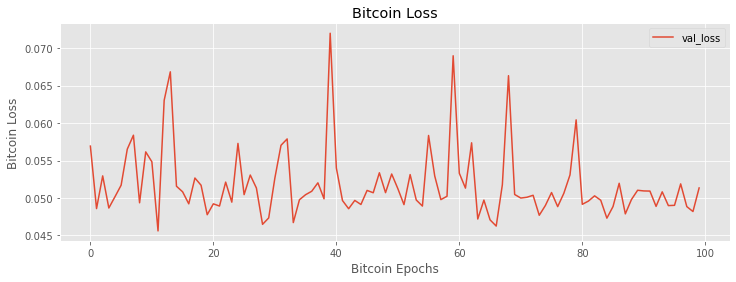

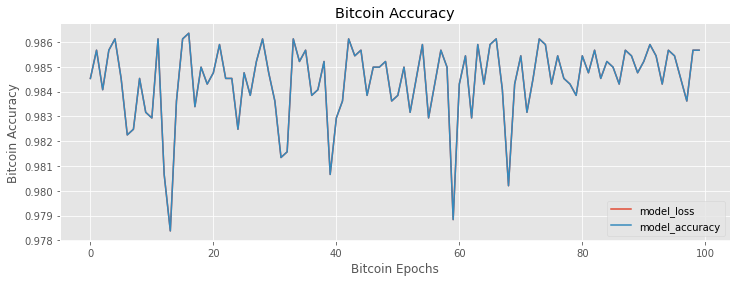

In [255]:
visualize_training_finding(finding)